In [6]:
# import os

# path = '../data/ch_food/colors'
# images_name = os.listdir(path)
# images_name.sort()
# rew_names = [x.split(' ')[0]+'.jpg' for x in images_name]
# print(rew_names)
# for i in range(len(images_name)):
#     os.rename(os.path.join(path, images_name[i]), os.path.join(path, rew_names[i]))

['1.jpg', '10.jpg', '100.jpg', '1000.jpg', '1001.jpg', '1002.jpg', '1003.jpg', '1004.jpg', '1005.jpg', '1006.jpg', '1007.jpg', '1008.jpg', '1009.jpg', '101.jpg', '1010.jpg', '1011.jpg', '1012.jpg', '1013.jpg', '1014.jpg', '1015.jpg', '1016.jpg', '1017.jpg', '1018.jpg', '1019.jpg', '102.jpg', '1020.jpg', '1021.jpg', '1022.jpg', '1023.jpg', '1024.jpg', '1025.jpg', '1026.jpg', '1027.jpg', '1028.jpg', '1029.jpg', '103.jpg', '1030.jpg', '1031.jpg', '1032.jpg', '1033.jpg', '1034.jpg', '1035.jpg', '1036.jpg', '1037.jpg', '1038.jpg', '1039.jpg', '104.jpg', '1040.jpg', '1041.jpg', '1042.jpg', '1043.jpg', '1044.jpg', '1045.jpg', '1046.jpg', '1047.jpg', '1048.jpg', '1049.jpg', '105.jpg', '1050.jpg', '1051.jpg', '1052.jpg', '1053.jpg', '1054.jpg', '1055.jpg', '1056.jpg', '1057.jpg', '1058.jpg', '1059.jpg', '106.jpg', '1060.jpg', '1061.jpg', '1062.jpg', '1063.jpg', '1064.jpg', '1065.jpg', '1066.jpg', '1067.jpg', '1068.jpg', '1069.jpg', '107.jpg', '1070.jpg', '1071.jpg', '1072.jpg', '1073.jpg', '107

In [87]:
import pandas as pd

df = pd.read_excel('../data/ch_food/fooddata_sort.xlsx', header = None)
data=df.values
# print("获取到所有的值:\n{}".format(data))
data = [str(x) for x in data]
print(data)
rows = []
for i in range(len(data)):
    d = data[i].split(" ")
    row = [d[0], d[1], d[3], d[5]]
    row = [int(i[1:]) for i in row]
    rows.append(row)
print(rows)

["[15 '1 米饭' '10 红椒' '13 鸡肉']", "[48 '1 米饭' '10 红椒' '13 鸡肉']", "[80 '1 米饭' '10 红椒' '13 鸡肉']", "[101 '1 米饭' '10 红椒' '13 鸡肉']", "[134 '1 米饭' '10 红椒' '13 鸡肉']", "[166 '1 米饭' '10 红椒' '13 鸡肉']", "[456 '1 米饭' '10 红椒' '13 鸡肉']", "[458 '1 米饭' '10 红椒' '13 鸡肉']", "[574 '1 米饭' '10 红椒' '13 鸡肉']", "[781 '1 米饭' '10 红椒' '13 鸡肉']", "[826 '1 米饭' '10 红椒' '13 鸡肉']", "[848 '1 米饭' '10 红椒' '13 鸡肉']", "[864 '1 米饭' '10 红椒' '13 鸡肉']", "[876 '1 米饭' '10 红椒' '13 鸡肉']", "[977 '1 米饭' '10 红椒' '13 鸡肉']", "[1039 '1 米饭' '10 红椒' '13 鸡肉']", "[1082 '1 米饭' '10 红椒' '13 鸡肉']", "[34 '1 米饭' '10 红椒' '15 烧肉']", "[55 '1 米饭' '10 红椒' '15 烧肉']", "[86 '1 米饭' '10 红椒' '15 烧肉']", "[120 '1 米饭' '10 红椒' '15 烧肉']", "[141 '1 米饭' '10 红椒' '15 烧肉']", "[172 '1 米饭' '10 红椒' '15 烧肉']", "[298 '1 米饭' '10 红椒' '15 烧肉']", "[318 '1 米饭' '10 红椒' '15 烧肉']", "[490 '1 米饭' '10 红椒' '15 烧肉']", "[507 '1 米饭' '10 红椒' '15 烧肉']", "[543 '1 米饭' '10 红椒' '15 烧肉']", "[603 '1 米饭' '10 红椒' '15 烧肉']", "[661 '1 米饭' '10 红椒' '15 烧肉']", "[698 '1 米饭' '10 红椒' '15 烧肉']", "[838 '1 米饭

In [89]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def convert(row):
    path = '../data/ch_food/colors/' + str(row[0]) + '.jpg'
    dst_path = '../data/ch_food/mask/' + str(row[0]) + '.png'
    
    gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    index1 = np.where((gray>220) & (gray<230))
    index2 = np.where(gray<50)
    index3 = np.where((gray>90) & (gray<110))

    gray[:,:] = 0
    gray[index1] = row[1]
    gray[index2] = row[2]
    gray[index3] = row[3]

    kernel = np.ones((3, 3), dtype=np.uint8)
    gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel, 1)
    obj_ids = np.unique(gray)
    obj_ids = obj_ids[1:] if obj_ids[0] == 0 else obj_ids
    if len(obj_ids) != 3:
        print(path)
    # print(image)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # print(gray)
    # plt.imshow(image)
    # plt.show()
    # obj_ids = np.unique(gray)
    # print(obj_ids)
    # print(gray)
    # index1 = np.where(gray<70)
    # index2 = np.where((gray > 90) & (gray < 100))
    # index3 = np.where((gray > 170) & (gray < 180))
    # index1 = np.where(gray==54)
    # index2 = np.where(gray==94)
    # index3 = np.where(gray==177)
    # print(index1)
    # gray[:,:] = 0
    # obj_ids = np.unique(gray)
    # print(obj_ids)  
    # gray[index1] = row[3]
    # gray[index2] = row[2]
    # gray[index3] = row[1]
    # obj_ids = np.unique(gray)
    # print(obj_ids)
    # print(row[1], row[2], row[3])
    # _, binary_mask = cv2.threshold(gray.astype(np.uint8), 70, 255, cv2.THRESH_BINARY)
    # plt.imshow(gray)
    # plt.savefig('mask.jpg', dpi=500)
    # plt.show()
    cv2.imwrite(dst_path, gray)

# convert(rows[0])
for row in rows:
    convert(row)

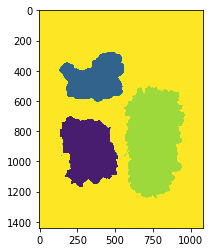

[ 29  32  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255]


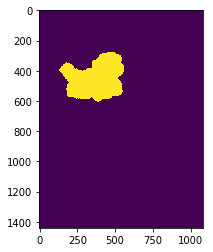

[0 1]
[[134, 276, 562, 604]]


In [84]:
import cv2
import numpy as np

path = '../data/1.jpg'
# dst_path = './data/ch_food/mask/' + str(row[0]) + '.png'

image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
# image = cv2.fastNlMeansDenoising(image)
plt.imshow(image)
plt.show()
# print(image)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = image
obj_ids = np.unique(image)
print(obj_ids)
# # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# np.set_printoptions(threshold=np.inf)
# # print(image)
# # print(gray)
# # plt.imshow(image)
# # plt.show()
# obj_ids = np.unique(gray)
# print(obj_ids)
# # print(gray)
index1 = np.where((gray>220) & (gray<230))
index2 = np.where(gray<50)
index3 = np.where((gray>90) & (gray<110))

gray[:,:] = 0
# obj_ids = np.unique(gray)
# print(obj_ids)  
gray[index1] = 0
gray[index2] = 0
gray[index3] = 1

kernel = np.ones((3, 3), dtype=np.uint8)
gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel, 1)
# ss = np.hstack((gray, opening))

plt.imshow(gray)
plt.show()
obj_ids = np.unique(gray)
print(obj_ids)
obj_ids = obj_ids[1:] if obj_ids[0] == 0 else obj_ids
masks = gray == obj_ids[:, None, None]
num_objs = len(obj_ids)
boxes = []
for i in range(num_objs):
    pos = np.where(masks[i])
    xmin = np.min(pos[1])
    xmax = np.max(pos[1])
    ymin = np.min(pos[0])
    ymax = np.max(pos[0])
    boxes.append([xmin, ymin, xmax, ymax])
print(boxes)
# # print(row[1], row[2], row[3])
# # _, binary_mask = cv2.threshold(gray.astype(np.uint8), 70, 255, cv2.THRESH_BINARY)
# # plt.imshow(gray)
# # plt.savefig('mask.jpg', dpi=500)
# # plt.show()
# cv2.imwrite(dst_path, gray)

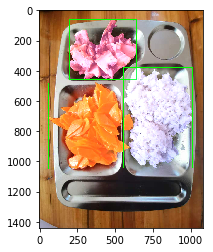

In [74]:
from PIL import Image
import torch
import random
import matplotlib.pyplot as plt

def random_colour_masks(image):
    colours = [[0, 255, 0],[0, 0, 255],[255, 0, 0],[0, 255, 255],[255, 255, 0],[255, 0, 255],[80, 70, 180],[250, 80, 190],[245, 145, 50],[70, 150, 250],[50, 190, 190]]
    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
    r[image == 1], g[image == 1], b[image == 1] = colours[random.randrange(0,10)]
    coloured_mask = np.stack([r, g, b], axis=2)
    return coloured_mask

img = Image.open('../data/ch_food/test_images/5.png').convert("RGB")
# note that we haven't converted the mask to RGB,
# because each color corresponds to a different instance
# with 0 being background
boxes = [[(i[0], i[1]), (i[2], i[3])] for i in boxes]
image = np.asarray(img)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
for i in range(len(masks)):
    rgb_mask = random_colour_masks(masks[i])
    image = cv2.addWeighted(image, 1, rgb_mask, 0.5, 0)
    cv2.rectangle(image, boxes[i][0], boxes[i][1], color=(0, 255, 0), thickness=3)

plt.imshow(image)
plt.savefig('mask_image.png',dpi=300)
plt.show()

In [46]:
from PIL import Image
import torch
import random

def random_colour_masks(image):
    colours = [[0, 255, 0],[0, 0, 255],[255, 0, 0],[0, 255, 255],[255, 255, 0],[255, 0, 255],[80, 70, 180],[250, 80, 190],[245, 145, 50],[70, 150, 250],[50, 190, 190]]
    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
    r[image == 1], g[image == 1], b[image == 1] = colours[random.randrange(0,10)]
    coloured_mask = np.stack([r, g, b], axis=2)
    return coloured_mask

img = Image.open('./data/ch_food/train_images/15.png').convert("RGB")
# note that we haven't converted the mask to RGB,
# because each color corresponds to a different instance
# with 0 being background
mask = Image.open('./data/ch_food/mask/15.png')
# convert the PIL Image into a numpy array
mask = np.array(mask)
# instances are encoded as different colors
obj_ids = np.unique(mask)
print(obj_ids)
# first id is the background, so remove it
obj_ids = obj_ids[1:] if obj_ids[0] == 0 else obj_ids
# print(mask)
# split the color-encoded mask into a set
# of binary masks
masks = mask == obj_ids[:, None, None]

# get bounding box coordinates for each mask
num_objs = len(obj_ids)
boxes = []
for i in range(num_objs):
    pos = np.where(masks[i])
    xmin = np.min(pos[1])
    xmax = np.max(pos[1])
    ymin = np.min(pos[0])
    ymax = np.max(pos[0])
    boxes.append([xmin, ymin, xmax, ymax])

# convert everything into a torch.Tensor
boxes = torch.as_tensor(boxes, dtype=torch.float32)
labels = torch.as_tensor(obj_ids, dtype=torch.int64)

# print(labels)
masks = torch.as_tensor(masks, dtype=torch.uint8)

# 可视化代码
boxes = boxes.int()
boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(boxes.detach().numpy())]
image = np.asarray(img)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
for i in range(len(masks)):
    rgb_mask = random_colour_masks(masks[i])
    image = cv2.addWeighted(image, 1, rgb_mask, 0.5, 0)
    cv2.rectangle(image, boxes[i][0], boxes[i][1], color=(0, 255, 0), thickness=3)

plt.imshow(image)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './data/ch_food/train_images/15.png'

In [100]:
counts = [0 for i in range(24)]
print(len(rows))
for row in rows:
    counts[row[1]] += 1
    counts[row[2]] += 1
    counts[row[3]] += 1

print(counts)

1117
[0, 1117, 72, 16, 83, 94, 49, 68, 29, 135, 184, 170, 158, 83, 105, 94, 68, 136, 68, 151, 159, 110, 133, 69]


['米饭', '白萝卜', '菠菜', '炒白菜', '炒鸡蛋', '豆腐', '豆角', '豆芽', '荷兰豆', '红椒', '红萝卜', '黄瓜', '鸡肉', '青椒', '烧肉', '洋葱', '鸡脚', '烤鸭', '腊肠', '牛肚', '牛筋', '猪耳', '猪脚']


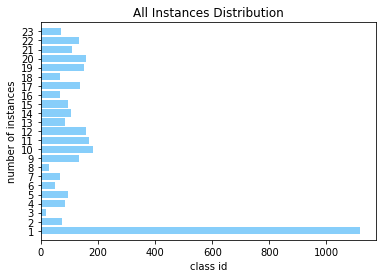

[0, 1117, 72, 16, 83, 94, 49, 68, 29, 135, 184, 170, 158, 83, 105, 94, 68, 136, 68, 151, 159, 110, 133, 69]


In [106]:
import matplotlib.pyplot as plt
import json

classes = json.load(open('/home/hatsunemiku/dev/mask-rcnn/data/ch_food/classes.json'))
classes = {value:key for key,value in classes.items()}
classes = [classes[i] for i in range(1,24)]
print(classes)

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.barh(range(len(counts)), counts,  color="#87CEFA")  
# 设置横轴标签
plt.xlabel('class id')
plt.ylim(0,24)
# 设置纵轴标签
plt.ylabel('number of instances')
# 添加标题
plt.title('All Instances Distribution')
# 添加纵横轴的刻度
plt.yticks(range(1, 24))
# plt.yticks(np.arange(0, 10000, 10))
plt.savefig('ch_food.png', dpi=300)
plt.show()  
print(counts)

In [107]:
from sklearn.model_selection import train_test_split
import os

with open('../data/ch_food/labels.txt', 'r') as f:
    lines = f.readlines()
f.close()
lines = [line.strip().split(' ') for line in lines]
for i in range(len(lines)):
    lines[i][1] = int(lines[i][1])
    lines[i][2] = int(lines[i][2])
    lines[i][3] = int(lines[i][3])
# print(lines)

with open('../data/ch_food/train.txt', 'r') as f:
    train_list = f.readlines()
with open('../data/ch_food/test.txt', 'r') as f:
    test_list = f.readlines()
train = [x.strip() for x in train_list]
test = [x.strip() for x in test_list]

train_list = []
test_list = []

for line in lines:
    if line[0] in train:
        train_list.append(line)
    else:
        test_list.append(line)
print(train_list)
# print(len(train_list))

['2.png\n', '3.png\n', '6.png\n', '7.png\n', '8.png\n', '9.png\n', '14.png\n', '15.png\n', '18.png\n', '20.png\n', '22.png\n', '23.png\n', '25.png\n', '26.png\n', '27.png\n', '28.png\n', '29.png\n', '31.png\n', '32.png\n', '33.png\n', '34.png\n', '36.png\n', '40.png\n', '42.png\n', '44.png\n', '46.png\n', '48.png\n', '49.png\n', '50.png\n', '51.png\n', '52.png\n', '53.png\n', '54.png\n', '55.png\n', '57.png\n', '59.png\n', '62.png\n', '63.png\n', '65.png\n', '66.png\n', '70.png\n', '71.png\n', '74.png\n', '77.png\n', '78.png\n', '79.png\n', '80.png\n', '81.png\n', '82.png\n', '83.png\n', '86.png\n', '91.png\n', '92.png\n', '93.png\n', '95.png\n', '97.png\n', '98.png\n', '99.png\n', '100.png\n', '101.png\n', '102.png\n', '105.png\n', '108.png\n', '109.png\n', '111.png\n', '112.png\n', '113.png\n', '114.png\n', '116.png\n', '118.png\n', '121.png\n', '122.png\n', '123.png\n', '124.png\n', '125.png\n', '126.png\n', '127.png\n', '129.png\n', '130.png\n', '131.png\n', '132.png\n', '133.png\n

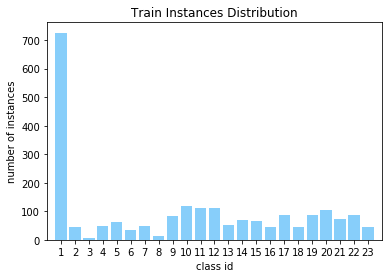

[0, 726, 45, 8, 50, 63, 36, 50, 14, 85, 117, 112, 111, 51, 68, 65, 45, 86, 46, 88, 106, 73, 87, 46]


In [109]:
train_counts = [0 for i in range(24)]
for data in train_list:
    train_counts[data[1]] += 1
    train_counts[data[2]] += 1
    train_counts[data[3]] += 1

import matplotlib.pyplot as plt
import json

classes = json.load(open('/home/hatsunemiku/dev/mask-rcnn/data/ch_food/classes.json'))
classes = {value:key for key,value in classes.items()}
classes = [classes[i] for i in range(1,24)]

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.bar(range(len(train_counts)), train_counts,  color="#87CEFA")  
# 设置横轴标签
plt.xlabel('class id')
plt.xlim(0,24)
# 设置纵轴标签
plt.ylabel('number of instances')
# 添加标题
plt.title('Train Instances Distribution')
# 添加纵横轴的刻度
plt.xticks(range(1, 24))
# plt.yticks(np.arange(0, 10000, 10))
plt.savefig('ch_food_train.png', dpi=300)
plt.show()  
print(train_counts)

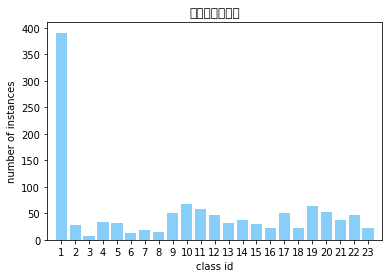

[0, 391, 27, 8, 33, 31, 13, 18, 15, 50, 67, 58, 47, 32, 37, 29, 23, 50, 22, 63, 53, 37, 46, 23]


In [110]:
test_counts = [0 for i in range(24)]
for data in test_list:
    test_counts[data[1]] += 1
    test_counts[data[2]] += 1
    test_counts[data[3]] += 1

import matplotlib.pyplot as plt
import json

classes = json.load(open('/home/hatsunemiku/dev/mask-rcnn/data/ch_food/classes.json'))
classes = {value:key for key,value in classes.items()}
classes = [classes[i] for i in range(1,24)]

plt.rcParams['font.family'] = ['Microsoft YaHei']
# plt.rcParams['font.sans-serif'] = ['SimHei']
plt.bar(range(len(test_counts)), test_counts,  color="#87CEFA")  
# 设置横轴标签
plt.xlabel('class id')
plt.xlim(0,24)
# 设置纵轴标签
plt.ylabel('number of instances')
# 添加标题
plt.title('测试集数据分布')
# 添加纵横轴的刻度
plt.xticks(range(1, 24))
# plt.yticks(np.arange(0, 10000, 10))
plt.savefig('ch_food_test.png', dpi=300)
plt.show()  
print(test_counts)

In [93]:
with open('../data/ch_food/train.txt', 'r') as f:
    train_list = f.readlines()
with open('../data/ch_food/test.txt', 'r') as f:
    test_list = f.readlines()
train_list = [x.strip() for x in train_list]
test_list = [x.strip() for x in test_list]
print(train_list)


['2.png', '3.png', '6.png', '7.png', '8.png', '9.png', '14.png', '15.png', '18.png', '20.png', '22.png', '23.png', '25.png', '26.png', '27.png', '28.png', '29.png', '31.png', '32.png', '33.png', '34.png', '36.png', '40.png', '42.png', '44.png', '46.png', '48.png', '49.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '57.png', '59.png', '62.png', '63.png', '65.png', '66.png', '70.png', '71.png', '74.png', '77.png', '78.png', '79.png', '80.png', '81.png', '82.png', '83.png', '86.png', '91.png', '92.png', '93.png', '95.png', '97.png', '98.png', '99.png', '100.png', '101.png', '102.png', '105.png', '108.png', '109.png', '111.png', '112.png', '113.png', '114.png', '116.png', '118.png', '121.png', '122.png', '123.png', '124.png', '125.png', '126.png', '127.png', '129.png', '130.png', '131.png', '132.png', '133.png', '136.png', '137.png', '138.png', '140.png', '141.png', '145.png', '146.png', '147.png', '148.png', '150.png', '151.png', '152.png', '153.png', '154.png', '155.pn

In [96]:
import shutil

for x in train_list:
    src_path = os.path.join('../data/ch_food/mask', x)
    drc_path = os.path.join('../data/ch_food/train_mask', x)
    shutil.move(src_path, drc_path)

In [97]:
os.chdir('/home/hatsunemiku/dev/mask-rcnn')
import transforms as T
from torchvision.datasets import ImageFolder
import torch

def getStat(train_data):
    '''
    Compute mean and variance for training data
    :param train_data: 自定义类Dataset(或ImageFolder即可)
    :return: (mean, std)
    '''
    print('Compute mean and variance for training data.')
    print(len(train_data))
    train_loader = torch.utils.data.DataLoader(
        train_data, batch_size=1, shuffle=False, num_workers=0,
        pin_memory=True)
    mean = torch.zeros(3)
    std = torch.zeros(3)
    for X, _ in train_loader:
        for d in range(3):
            mean[d] += X[:, d, :, :].mean()
            std[d] += X[:, d, :, :].std()
    mean.div_(len(train_data))
    std.div_(len(train_data))
    return list(mean.numpy()), list(std.numpy())

def get_transform_for_train():
    transform = T.Compose([T.ToTensor()])
    return transform

if __name__ == '__main__':
    train_dataset = ImageFolder(root='/home/hatsunemiku/dev/mask-rcnn/data/xxx', transform=get_transform_for_train())
    print(getStat(train_dataset))

Compute mean and variance for training data.
726


TypeError: __call__() missing 1 required positional argument: 'target'

In [1]:
import torch
import os
os.chdir('/home/hatsunemiku/dev/mask-rcnn')

import utils
import transforms as T
from dataloader import CHFoodDataset
from engine import train_one_epoch, evaluate
from model import get_model_instance_segmentation

def get_transform(train):
    transforms = []
    transforms.append(T.ToTensor())
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)


# train on the GPU or on the CPU, if a GPU is not available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

num_classes = 24
# use our dataset and defined transformations
dataset_test = CHFoodDataset('/home/hatsunemiku/dev/mask-rcnn/data/ch_food', get_transform(train=False), False)

data_loader = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, num_workers=0,
    collate_fn=utils.collate_fn)

# get the model using our helper function
model = get_model_instance_segmentation(num_classes)

# move model to the right device
model.to(device)
model.load_state_dict(torch.load('./chfood_model.pkl', map_location=torch.device('cpu')))

<All keys matched successfully>

In [2]:
import math
import sys
import time
import torch
import torchvision.models.detection.mask_rcnn
import utils
from coco_utils import get_coco_api_from_dataset
from coco_eval import CocoEvaluator

def _get_iou_types(model):
    model_without_ddp = model
    if isinstance(model, torch.nn.parallel.DistributedDataParallel):
        model_without_ddp = model.module
    iou_types = ["bbox"]
    if isinstance(model_without_ddp, torchvision.models.detection.MaskRCNN):
        iou_types.append("segm")
    if isinstance(model_without_ddp, torchvision.models.detection.KeypointRCNN):
        iou_types.append("keypoints")
    return iou_types


n_threads = torch.get_num_threads()
# FIXME remove this and make paste_masks_in_image run on the GPU
torch.set_num_threads(1)
cpu_device = torch.device("cpu")
model.eval()
metric_logger = utils.MetricLogger(delimiter="  ")
header = 'Test:'

coco = get_coco_api_from_dataset(data_loader.dataset)
iou_types = _get_iou_types(model)
coco_evaluator = CocoEvaluator(coco, iou_types)

for images, targets in metric_logger.log_every(data_loader, 100, header):
    images = list(img.to(device) for img in images)

    torch.cuda.synchronize()
    model_time = time.time()
    outputs = model(images)

    outputs = [{k: v.to(cpu_device) for k, v in t.items()} for t in outputs]
    model_time = time.time() - model_time

    res = {target["image_id"].item(): output for target, output in zip(targets, outputs)}
    evaluator_time = time.time()
    coco_evaluator.update(res)
    evaluator_time = time.time() - evaluator_time
    metric_logger.update(model_time=model_time, evaluator_time=evaluator_time)

# gather the stats from all processes
metric_logger.synchronize_between_processes()
print("Averaged stats:", metric_logger)
coco_evaluator.synchronize_between_processes()

# accumulate predictions from all images
coco_evaluator.accumulate()
coco_evaluator.summarize()
torch.set_num_threads(n_threads)

creating index...
index created!
Test:  [  0/391]  eta: 0:01:15  model_time: 0.0797 (0.0797)  evaluator_time: 0.0132 (0.0132)  time: 0.1939  data: 0.0780  max mem: 923
Test:  [100/391]  eta: 0:00:47  model_time: 0.0598 (0.0623)  evaluator_time: 0.0147 (0.0170)  time: 0.1596  data: 0.0789  max mem: 1483
Test:  [200/391]  eta: 0:00:31  model_time: 0.0606 (0.0628)  evaluator_time: 0.0150 (0.0174)  time: 0.1631  data: 0.0793  max mem: 1495
Test:  [300/391]  eta: 0:00:14  model_time: 0.0598 (0.0625)  evaluator_time: 0.0151 (0.0172)  time: 0.1649  data: 0.0783  max mem: 1575
Test:  [390/391]  eta: 0:00:00  model_time: 0.0597 (0.0620)  evaluator_time: 0.0148 (0.0170)  time: 0.1596  data: 0.0787  max mem: 1575
Test: Total time: 0:01:03 (0.1626 s / it)
Averaged stats: model_time: 0.0597 (0.0620)  evaluator_time: 0.0148 (0.0170)
Accumulating evaluation results...
DONE (t=0.14s).
Accumulating evaluation results...
DONE (t=0.14s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

draw_list = [0.5,0.75,0.8,0.85,0.9,0.95]
for iou_type, coco_eval in coco_evaluator.coco_eval.items():
    # pr_array = coco_eval.eval['precision'][0, :, 1:, 0, 2]
    # print(pr_array.shape)
    # pr_array = np.mean(pr_array,axis=1)
    # print(pr_array.shape)
    for i in range(10):
        pr_array = coco_eval.eval['precision'][i, :, :, 0, 2]
        # pr_array1 = coco_eval.eval['precision'][0, :, :, 0, 2]
        # pr_array2 = coco_eval.eval['precision'][5, :, :, 0, 2]
        # pr_array3 = coco_eval.eval['precision'][8, :, :, 0, 2]
        pr_array = np.mean(pr_array,axis=1)

        # pr_array1 = np.mean(pr_array1,axis=1)
        # pr_array2 = np.mean(pr_array2,axis=1)
        # pr_array3 = np.mean(pr_array3,axis=1)
        x = np.arange(0.0, 1.01, 0.01)
        plt.xlabel('recall')
        plt.ylabel('precision')
        plt.xlim(0, 1.0)
        plt.ylim(0, 1.01)
        plt.grid(True)

        # plt.plot(x, pr_array1, 'b-', label='IoU=0.5')
        # plt.plot(x, pr_array2, 'c-', label='IoU=0.75')
        # plt.plot(x, pr_array3, 'y-', label='IoU=0.9')
        iou = round(0.5+0.05*i, 2)
        if iou in draw_list:
            print(pr_array)
            plt.plot(x, pr_array, label='IoU='+str(iou))

    plt.legend(loc="lower left")
    plt.savefig("pr_curve_{}.jpg".format(iou_type), dpi=300)  #输入地址，并利用format函数修改图片名称
    plt.clf() #需要重新更新画布，否则会出现同一张画布上绘制多张图片


    print(coco_eval.eval['recall'].shape)
    for i in range(3):
        recall_array = coco_eval.eval['recall'][:, :, 0, i]
        recall_array = np.mean(recall_array, axis=1)
        x = np.arange(0.5, 1.0, 0.05)
        plt.xlabel('IoU')
        plt.ylabel('recall')
        plt.xlim(0.5, 0.95)
        plt.ylim(0, 1.01)
        plt.grid(True)

        plt.plot(x, recall_array, label='maxDets='+str(10**i))
    plt.legend(loc="lower left")
    plt.savefig("recall_iou_curve_{}.jpg".format(iou_type), dpi=300)  #输入地址，并利用format函数修改图片名称
    plt.clf() #需要重新更新画布，否则会出现同一张画布上绘制多张图片

[0.99637681 0.99637681 0.99637681 0.99637681 0.99637681 0.99637681
 0.99637681 0.9954895  0.9954895  0.9954895  0.9954895  0.9954895
 0.9954895  0.9954895  0.99367791 0.99367791 0.99367791 0.99367791
 0.99367791 0.99367791 0.99367791 0.99367791 0.99367791 0.99367791
 0.99367791 0.99367791 0.99367791 0.99367791 0.99367791 0.99367791
 0.99367791 0.99367791 0.99367791 0.99367791 0.99367791 0.99367791
 0.99367791 0.99282539 0.99282539 0.99282539 0.99282539 0.99282539
 0.99282539 0.99282539 0.99282539 0.99282539 0.99282539 0.99282539
 0.99282539 0.99282539 0.99282539 0.99282539 0.99282539 0.99282539
 0.99282539 0.99266316 0.99266316 0.99266316 0.99266316 0.99266316
 0.99111036 0.99111036 0.99111036 0.99111036 0.99111036 0.9904516
 0.9904516  0.98755305 0.98755305 0.98741951 0.98741951 0.98669488
 0.98669488 0.98669488 0.98669488 0.98655874 0.98655874 0.98646364
 0.98646364 0.98646364 0.98646364 0.98646364 0.98646364 0.9858517
 0.98575402 0.98575402 0.98575402 0.98575402 0.98455483 0.9845548

<Figure size 432x288 with 0 Axes>